## Подгрузка библиотек

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# 1. ДИСПЕРСИОННЫЙ АНАЛИЗ

## Подгрузка данных для дисперсионного анализа

Выгрузим данные из Excel-документа для проведения дальнейшей обработки и анализа данных:

In [2]:
data = pd.ExcelFile('C:/Users/Дмитрий/Downloads/Проект по теории вероятностей и математической статистике/data.xlsx')

Выведем наименования рабочих листов Excel-документа:

In [3]:
print(data.sheet_names)

['Дисперсионный анализ', 'Корреляционный анализ', 'МЛР', 'Логистическая регрессия']


Сформируем базу данных для проведения дисперсионного анализа:

In [4]:
df1 = data.parse('Дисперсионный анализ')

Выведем полученную базу данных для первичной визуальной оценки:

In [5]:
df1

,Региональная территориальная единица,"Валовый региональный продукт, млн. руб., (y)","Социально-экономические условия инновационной деятельности, (n=1)","Научно-технический потенциал, (n=2)","Инновационная деятельность, (n=3)","Качество инновационной политики, (n=4)"
0,Алтайский край,487903.3,NaN,NaN,0.4003,0.4948
1,Астраханская область,322303.0,0.4431,NaN,NaN,NaN
2,Владимирская область,368489.2,NaN,NaN,0.3688,NaN
3,Волгоградская область,740458.0,NaN,NaN,NaN,0.4828
4,Вологодская область,478893.0,NaN,NaN,NaN,0.4986
5,Ивановская область,180517.5,NaN,0.3968,NaN,NaN
6,Иркутская область,1001717.6,NaN,0.3821,NaN,NaN
7,Калининградская область,349818.6,0.4675,NaN,NaN,NaN
8,Калужская область,339760.8,0.4829,0.4385,NaN,NaN
9,Камчатский край,175404.8,NaN,NaN,NaN,0.4444


Выведем количество объектов, включенных в каждый из k уровней, как сумму элементов, входящих в рассматриваемую совокупность:

In [6]:
k = 4

In [7]:
df1.iloc[52, 1:]

Валовый региональный продукт, млн. руб., (y)                         52
Социально-экономические условия инновационной деятельности, (n=1)    28
Научно-технический потенциал, (n=2)                                  16
Инновационная деятельность, (n=3)                                    15
Качество инновационной политики, (n=4)                               23
Name: 52, dtype: object

In [8]:
m1 = df1.iloc[52, 2]
m1

28.0

In [9]:
m2 = df1.iloc[52, 3]
m2

16.0

In [10]:
m3 = df1.iloc[52, 4]
m3

15.0

In [11]:
m4 = df1.iloc[52, 5]
m4

23.0

Затем определим общее количество объектов m, вошедших во все выборки:

In [12]:
m = df1.iloc[52, 2:].sum()
m

82.0

### * формирование выборочных групп

Для удобства расчетов сформируем выборочные группы по k имеющимся уровням.

#### Социально-экономические условия инновационной деятельности, (n=1)

In [13]:
n1 = df1.drop('Научно-технический потенциал, (n=2)', axis = 1)
n1 = n1.drop('Инновационная деятельность, (n=3)', axis = 1)
n1 = n1.drop('Качество инновационной политики, (n=4)', axis = 1)
n1 = n1.dropna()
n1 = n1.drop('Социально-экономические условия инновационной деятельности, (n=1)', axis = 1)
n1 = n1.drop(52, axis = 0)
n1 = n1.drop('Региональная территориальная единица', axis = 1)
n1

,"Валовый региональный продукт, млн. руб., (y)"
1,322303.0
7,349818.6
8,339760.8
13,1667041.1
20,3180924.6
21,401582.7
22,1104643.2
23,1021642.9
26,1063780.3
27,1316598.3


In [14]:
n1.shape

(28, 1)

#### Научно-технический потенциал, (n=2)

In [15]:
n2 = df1.drop('Социально-экономические условия инновационной деятельности, (n=1)', axis = 1)
n2 = n2.drop('Инновационная деятельность, (n=3)', axis = 1)
n2 = n2.drop('Качество инновационной политики, (n=4)', axis = 1)
n2 = n2.dropna()
n2 = n2.drop('Научно-технический потенциал, (n=2)', axis = 1)
n2 = n2.drop(52, axis = 0)
n2 = n2.drop('Региональная территориальная единица', axis = 1)

In [16]:
n2.shape

(16, 1)

#### Инновационная деятельность, (n=3)

In [17]:
n3 = df1.drop('Социально-экономические условия инновационной деятельности, (n=1)', axis = 1)
n3 = n3.drop('Научно-технический потенциал, (n=2)', axis = 1)
n3 = n3.drop('Качество инновационной политики, (n=4)', axis = 1)
n3 = n3.dropna()
n3 = n3.drop('Инновационная деятельность, (n=3)', axis = 1)
n3 = n3.drop(52, axis = 0)
n3 = n3.drop('Региональная территориальная единица', axis = 1)

In [18]:
n3.shape

(15, 1)

#### Качество инновационной политики, (n=4)

In [19]:
n4 = df1.drop('Социально-экономические условия инновационной деятельности, (n=1)', axis = 1)
n4 = n4.drop('Научно-технический потенциал, (n=2)', axis = 1)
n4 = n4.drop('Инновационная деятельность, (n=3)', axis = 1)
n4 = n4.dropna()
n4 = n4.drop('Качество инновационной политики, (n=4)', axis = 1)
n4 = n4.drop(52, axis = 0)
n4 = n4.drop('Региональная территориальная единица', axis = 1)

In [20]:
n4.shape

(23, 1)

## среднее по группам

In [21]:
y_n1_mean = n1.mean()
y_n1_mean

Валовый региональный продукт, млн. руб., (y)    1.183444e+06
dtype: float64

In [22]:
y_n2_mean = n2.mean()
y_n2_mean

Валовый региональный продукт, млн. руб., (y)    1338762.1
dtype: float64

In [23]:
y_n3_mean = n3.mean()
y_n3_mean

Валовый региональный продукт, млн. руб., (y)    1.810813e+06
dtype: float64

In [24]:
y_n4_mean = n4.mean()
y_n4_mean

Валовый региональный продукт, млн. руб., (y)    1.181169e+06
dtype: float64

## общее среднее по всем имеющимся значениям

In [25]:
y_mean = (n1.sum() + n2.sum() + n3.sum() + n4.sum()) / m
y_mean

Валовый региональный продукт, млн. руб., (y)    1.327875e+06
dtype: float64

## сумма квадратов отклонений наблюдений от общего среднего

In [26]:
S_2 = (((n1 - y_mean)**2).sum() + ((n2 - y_mean)**2).sum() + ((n3 - y_mean)**2).sum() + ((n4 - y_mean)**2).sum())
S_2 = S_2[0]
S_2

273857310599371.44

## сумма квадратов отклонений средних по группам от общего среднего

In [27]:
S2F = ((y_n1_mean - y_mean)**2)*m1 + ((y_n2_mean - y_mean)**2)*m2 + ((y_n3_mean - y_mean)**2)*m3 + \
      ((y_n4_mean - y_mean)**2)*m4
S2F = S2F[0]
S2F

4579445884112.965

## остаточная сумма квадратов отклонений

In [28]:
S_2_ost = ((n1 - y_n1_mean)**2).sum() + ((n2 - y_n2_mean)**2).sum() + ((n3 - y_n3_mean)**2).sum() + \
          ((n4 - y_n4_mean)**2).sum()
S_2_ost = S_2_ost[0]
S_2_ost

269277864715258.47

### * проверка, полученных сумм квадратов отклонений

In [29]:
S2F + S_2_ost

273857310599371.44

In [30]:
S_2

273857310599371.44

## факторная дисперсия

In [31]:
G2F = S2F / (k - 1)
G2F

1526481961370.9883

## остаточная дисперсия

In [32]:
G2rest = S_2_ost / (m - k)
G2rest

3452280316862.288

## Ff - фактическое

In [33]:
Ff = G2F / G2rest
Ff

0.44216628467713154

## Fc - критическое значение метрики для распределения Фишера-Снедекора

In [34]:
a = 1 - 0.05 # разность единицы и заданного уровня надежности

ddf1 = k - 1 # межуровневая степень свободы

ddf2 = m - k # внутренняя степень свободы

def Fk (a, ddf1, ddf2):    # функция для расчета Fc
    import scipy.stats
    return scipy.stats.f.ppf(a, ddf1, ddf2)

Fc = Fk (a, ddf1, ddf2)
Fc

2.7217833821453663

In [35]:
Ff > Fc

False

Из этого следует, что различия между группами регионов, вошедших в выборки по ключевым индикаторам инновационного развития субъектов РФ и имеющих лучшие значения по данным критериям, являются статистически незначимыми в отношении наличия различий по величине ВРП. Это может указывать на то, что данные индикаторы не оказывают существенного влияния на изменение экономического роста регионов или сравниваемые комплексные оценки являются взаимообусловленными.

# 2. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

Сформируем базу данных для проведения корреляционного анализа:

In [36]:
df2 = data.parse('Корреляционный анализ')

df2 = df2.drop('Территория', axis = 1)

Выведем полученную базу данных для первичной визуальной оценки:

In [37]:
df2

,"Валовой региональный продукт (в текущих ценах, млн. руб.), 2015","Социально-экономические условия инновационной деятельности, 2015","Научно-технический потенциал, 2015","Инновационная деятельность, 2015","Качество инновационной политики, 2015"
0,487903.3,0.3038,0.2771,0.4003,0.4948
1,277380.4,0.3151,0.2264,0.1949,0.2222
2,627698.1,0.2977,0.3235,0.2489,0.2671
3,322303.0,0.4431,0.2248,0.2714,0.3372
4,693379.4,0.3946,0.3159,0.2900,0.6259
5,271782.5,0.3446,0.2499,0.3342,0.3352
6,368489.2,0.3651,0.3075,0.3688,0.2914
7,740458.0,0.3435,0.2812,0.2418,0.4828
8,478893.0,0.3191,0.2910,0.2478,0.4986
9,805969.6,0.3993,0.3270,0.3141,0.6278


In [38]:
df2.corr()

,"Валовой региональный продукт (в текущих ценах, млн. руб.), 2015","Социально-экономические условия инновационной деятельности, 2015","Научно-технический потенциал, 2015","Инновационная деятельность, 2015","Качество инновационной политики, 2015"
"Валовой региональный продукт (в текущих ценах, млн. руб.), 2015",1.000000,0.666872,0.453950,0.265194,0.157129
"Социально-экономические условия инновационной деятельности, 2015",0.666872,1.000000,0.590508,0.393532,0.228881
"Научно-технический потенциал, 2015",0.453950,0.590508,1.000000,0.400692,0.289702
"Инновационная деятельность, 2015",0.265194,0.393532,0.400692,1.000000,0.489195
"Качество инновационной политики, 2015",0.157129,0.228881,0.289702,0.489195,1.000000


## Выводы по реализованному корреляционному анализу

### 1). Валовый региональный продукт

Прослеживается линейная связь между социально-экономическими условиями деятельности. Есть отклик от научно-технического потенциала. Инновационная деятельность и качество инновационной политики линейно практически никак не отражается на росте или снижении экономического роста регионов РФ.

### 2). Социально-экономические условия инновационной деятельности

Данный показатель довольно сильно коррелирует со значениями показателя характеризующего научно-технический потенциал регионов РФ. В связи с чем это может указывать и на наличие высокой корреляционной связи между ВРП и научно-техническим потенциалом. Прослеживается связь с показателями инновационной деятельности. С качеством инновационной политики - не существенная.

### 3). Научно-технический потенциал

Значения данного показателя коррелируют со значениями показателей характеризующих инновационную деятельность регионов России. Прослеживается более сильная связь с качеством инновационной политики, чем у предыдущих показателей.

### 4). Инновационная деятельность и качество инновационной политики

Данные показатели в большей мере коррелируют между собой, нежели остальные.

#### Общий вывод

Из всего этого следует отметить, что есть взаимообусловленность между рассматриваемыми метриками, что подтверждает выводы, полученные в ходе проведения дисперсионного анализа, который показал отсутствие статистически значимой разницы между величиной ВРП объектов, входящих в разные категориальные группы по уровню инновационного развития регионов.

# 3. МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ

Сформируем базу данных для построения базовой модели множественной линейной регрессии:

In [39]:
df3 = data.parse('МЛР')

df3 = df3.drop('Территория', axis = 1)

Выведем полученную базу данных для первичной визуальной оценки:

In [40]:
df3

,"Валовой региональный продукт (в текущих ценах, млн. руб.), 2015","Социально-экономические условия инновационной деятельности, 2015","Научно-технический потенциал, 2015","Инновационная деятельность, 2015","Качество инновационной политики, 2015"
0,487903.3,0.3038,0.2771,0.4003,0.4948
1,277380.4,0.3151,0.2264,0.1949,0.2222
2,627698.1,0.2977,0.3235,0.2489,0.2671
3,322303.0,0.4431,0.2248,0.2714,0.3372
4,693379.4,0.3946,0.3159,0.2900,0.6259
5,271782.5,0.3446,0.2499,0.3342,0.3352
6,368489.2,0.3651,0.3075,0.3688,0.2914
7,740458.0,0.3435,0.2812,0.2418,0.4828
8,478893.0,0.3191,0.2910,0.2478,0.4986
9,805969.6,0.3993,0.3270,0.3141,0.6278


Инструмент для построения данной модели подгружен в разделе "Подгрузка библиотек". Выполним необходимые процедуры:

In [41]:
VRP_model = LinearRegression()

In [42]:
predictors_VRP_model = ['Социально-экономические условия инновационной деятельности, 2015',
                       'Научно-технический потенциал, 2015',
                       'Инновационная деятельность, 2015',
                       'Качество инновационной политики, 2015']

In [43]:
VRP_model.fit(df3[predictors_VRP_model], df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### просмотр коэффициентов регрессии

#### b0

In [44]:
VRP_model.intercept_

-3964780.8675025916

#### b1, ..., bn, ...

In [45]:
VRP_model.coef_

array([11310999.27828348,  1854358.58868606,  -173667.55412843,
         -50769.69275467])

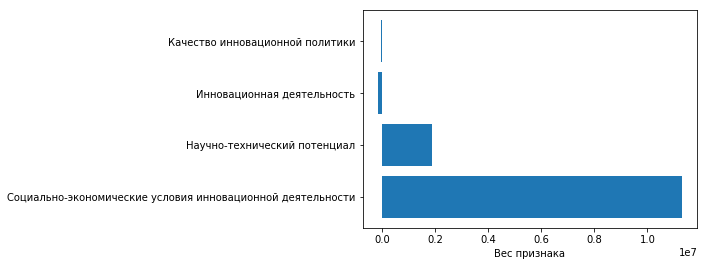

In [46]:
plt.barh(['Социально-экономические условия инновационной деятельности',
                       'Научно-технический потенциал',
                       'Инновационная деятельность',
                       'Качество инновационной политики'],
         VRP_model.coef_.flatten())

plt.xlabel('Вес признака')

plt.show()

### коэффициент детерминации

In [47]:
y_pred = VRP_model.predict(df3[predictors_VRP_model])

In [48]:
R2 = r2_score(df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'], y_pred)
R2

0.45050012441228315

#### * скорректированный коэффициент детерминации

In [49]:
# R2 - коэффициент детерминации

nn = len(df3) # количество наблюдений в модели

pp = 4 # количество предикторов

def adj_r2_score (R2, nn, pp):
    return 1 - (1 - R2)*(nn - 1)/(nn - pp -1)

r2_m = adj_r2_score (R2, nn, pp)
r2_m

0.42302513063289726

### F-критерий Фишера

#### общая сумма квадратов регрессии

In [50]:
VRP_mean = df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'].mean()
VRP_mean

834396.604705882

In [51]:
SS = ((df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'] - VRP_mean)**2).sum()
SS

228479656020013.56

#### объясненная сумма квадратов регрессии

In [52]:
SSf = ((y_pred - VRP_mean)**2).sum()
SSf

102930113462691.78

#### остаточная сумма квадратов регрессии

In [53]:
SSo = ((df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'] - y_pred)**2).sum()
SSo

125549542557321.78

для проверки также можно использовать следующее вычисление

In [54]:
SS - SSf

125549542557321.78

In [55]:
MSf = SSf / pp
MSf

25732528365672.945

In [56]:
MSo = SSo / (nn - (pp + 1))
MSo

1569369281966.5222

In [57]:
Ffr = MSf / MSo
Ffr

16.3967325353969

In [58]:
ar = 1 - 0.05 # разность единицы и заданного уровня надежности

ddf1r = pp

ddf2r = nn - (pp + 1)

Fcr = Fk (ar, ddf1r, ddf2r)
Fcr

2.485884937748868

In [59]:
Ffr > Fcr

True

Так как значение F расчетной статистики больше критического значения при заданном уровне значимости в 5 %, то гипотеза об одновременном равенстве нулю всех предикторов в регрессионной модели отвергается. Построенная модель является статистически значимой.

# 4. ОПРЕДЕЛЕНИЕ ЗНАЧИМОСТИ ЧАСТНЫХ КОЭФФИЦИЕНТОВ РЕГРЕССИИ

Двусторонняя критическая точка распределения Стьюдента при уровне значимости 5 % и степени свободы (85 - 4 - 1).

In [60]:
# a - заданный уровень значимости

# zn1 - степени свободы

def tk (a, zn1):    # функция для расчета tk
    import scipy.stats
    return abs(scipy.stats.t.ppf(a/2, zn1))

tkk = tk (0.05, ddf2r)
tkk

1.9900634210283845

матрица для определения стандартной ошибки параметров

In [61]:
X = np.hstack([np.ones((df3[predictors_VRP_model].shape[0],1)), df3[predictors_VRP_model]])

A = np.linalg.inv(np.dot(X.T, X))

A

array([[ 0.25848212, -0.42835508, -0.2002585 ,  0.03258903, -0.08119938],
       [-0.42835508,  2.37279337, -1.27639499, -0.32179566,  0.01933115],
       [-0.2002585 , -1.27639499,  2.61299157, -0.26783844, -0.12723808],
       [ 0.03258903, -0.32179566, -0.26783844,  1.09234507, -0.31548514],
       [-0.08119938,  0.01933115, -0.12723808, -0.31548514,  0.51573738]])

In [62]:
tb0 = abs(VRP_model.intercept_ / ((MSo * A [0, 0])**0.5))
tb0

6.225028769854409

In [63]:
tb0 > tkk

True

элемент модели "intercept" является в построенной модели статистически значимым

In [64]:
tb1 = abs(VRP_model.coef_[0] / ((MSo * A [1, 1])**0.5))
tb1

5.861495564232183

In [65]:
tb1 > tkk

True

параметр модели, характеризующий "Социально-экономические условия инновационной деятельности", при заданном уровне значимости приходится отличным от нуля

In [66]:
tb2 = abs(VRP_model.coef_[1] / ((MSo * A [2, 2])**0.5))
tb2

0.9157188239154141

In [67]:
tb2 > tkk

False

параметр модели, характеризующий "Научно-технический потенциал", при уровне значимости в 5 % является статистически не важным

In [68]:
tb3 = abs(VRP_model.coef_[2] / ((MSo * A [3, 3])**0.5))
tb3

0.13264051130160517

In [69]:
tb3 > tkk

False

параметр модели, характеризующий "Инновационную деятельность" также, как и предыдущий предиктор не нашел статистической обоснованности его включения в модель

In [70]:
tb4 = abs(VRP_model.coef_[3] / ((MSo * A [4, 4])**0.5))
tb4

0.05643228796321815

In [71]:
tb4 > tkk

False

параметр "Качество инновационной политики" также является статистически не значимым

В соответствии с полученными результатами, исключим статистически незначимые параметры из модели и сравним ее скорректированный коэффициент детерминации со значением базового моделирования.

In [72]:
VRP_model_new = LinearRegression()

In [73]:
predictors_VRP_model_new = ['Социально-экономические условия инновационной деятельности, 2015']

In [74]:
VRP_model_new.fit(df3[predictors_VRP_model_new], df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
VRP_model_new.intercept_

-3813320.763447309

In [76]:
VRP_model_new.coef_

array([12243723.30914961])

In [77]:
y_pred_new = VRP_model_new.predict(df3[predictors_VRP_model_new])

In [78]:
R2_new = r2_score(df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'], y_pred_new)
R2_new

0.44471797226494414

In [79]:
r2_m_new = adj_r2_score (R2_new, nn, 1)
r2_m_new

0.4380278273524736

In [80]:
r2_m_new > r2_m

True

Скорректированный R2 новой модели лучше, чем у базовой.

Следующим этапом оценим модель на F-критерий и проверим значимость параметров.

In [81]:
SSf_new = ((y_pred_new - VRP_mean)**2).sum()
SSf_new

101609009329012.33

In [82]:
SSo_new = ((df3['Валовой региональный продукт (в текущих ценах, млн. руб.), 2015'] - y_pred_new)**2).sum()
SSo_new

126870646691001.2

In [83]:
SS - SSf_new

126870646691001.23

In [84]:
MSf_new = SSf_new
MSo_new = SSo_new / (nn - 2)
Ffr_new = MSf_new / MSo_new
Ffr_new

66.47359333517298

In [85]:
Fcr_new = Fk (ar, 1, nn - 2)
Fcr_new

3.9559610071544236

In [86]:
Ffr_new > Fcr_new

True

Построенная новая модель является статистически значимой. Проверим на отличие от 0 параметры, включенные в нее.

In [87]:
X_new = np.hstack([np.ones((df3[predictors_VRP_model_new].shape[0],1)), df3[predictors_VRP_model_new]])

A_new = np.linalg.inv(np.dot(X_new.T, X_new))

A_new

array([[ 0.22435685, -0.56004252],
       [-0.56004252,  1.4753491 ]])

In [88]:
tb0_new = abs(VRP_model_new.intercept_ / ((MSo_new * A_new [0, 0])**0.5))
tb0_new

6.511666424092593

In [89]:
tkk_new = tk (0.05, nn - 2)
tkk_new

1.9889597799871794

In [90]:
tb0_new > tkk_new

True

In [91]:
tb_new = abs(VRP_model_new.coef_[0] / ((MSo_new * A_new [1, 1])**0.5))
tb_new

8.153133957882273

In [92]:
tb_new > tkk_new

True

Все параметры новой модели ("intercept" и "Социально-экономические условия инновационной деятельности") являются статистически значимыми. При этом удалось увеличить скорректированный R2.

## Вывод

Проведенное исследование еще раз показало отсутствие значимого влияния факторов научно-технологического развития представленного индексами условно характеризующими инновационную деятельность в стране, хотя в рамках экономической теории она должна оказывать самое прямое воздействие на динамику экономического роста (ВВП). Из всего этого может следовать вывод, что данные искусственно выведенные показатели не характеризуют в должной мере научно-технический потенциал территорий, их инновационную деятельность и инновационную политику проводимую на территории конкретно взятого региона.

# 5. Логистическая регрессия

Сформируем базу данных для построения логит модели.

In [93]:
df4 = data.parse('Логистическая регрессия')

Выведем полученную базу данных для предварительной визуальной оценки:

In [94]:
df4

,Территория,"Валовой региональный продукт (в текущих ценах, млн. руб.), 2014","Валовой региональный продукт (в ценах 2015 г., млн. руб.), 2014","Валовой региональный продукт (в текущих ценах, млн. руб.), 2015",Реальное изменение динамики ВРП к предыдущему году,"Социально-экономические условия инновационной деятельности, 2014","Социально-экономические условия инновационной деятельности, 2015",Приращение n=1,"Научно-технический потенциал, 2014","Научно-технический потенциал, 2015",Приращение n=2,"Инновационная деятельность, 2014","Инновационная деятельность, 2015",Приращение n=3,"Качество инновационной политики, 2014","Качество инновационной политики, 2015",Приращение n=4
0,Алтайский край,446023.8,4.794756e+05,487903.3,1,0.3042,0.3038,-0.0004,0.2978,0.2771,-0.0207,0.3881,0.4003,0.0122,0.4875,0.4948,0.0073
1,Амурская область,232053.0,2.494570e+05,277380.4,1,0.2893,0.3151,0.0258,0.2931,0.2264,-0.0667,0.2489,0.1949,-0.0540,0.3333,0.2222,-0.1111
2,Архангельская область,542695.3,5.833974e+05,627698.1,1,0.3317,0.2977,-0.0340,0.3478,0.3235,-0.0243,0.2456,0.2489,0.0033,0.2251,0.2671,0.0420
3,Астраханская область,296319.3,3.185432e+05,322303.0,1,0.3997,0.4431,0.0434,0.2757,0.2248,-0.0509,0.2509,0.2714,0.0205,0.3930,0.3372,-0.0558
4,Белгородская область,619677.7,6.661535e+05,693379.4,1,0.4049,0.3946,-0.0103,0.3350,0.3159,-0.0191,0.3359,0.2900,-0.0459,0.5173,0.6259,0.1086
5,Брянская область,242722.4,2.609266e+05,271782.5,1,0.3245,0.3446,0.0201,0.2043,0.2499,0.0456,0.3488,0.3342,-0.0146,0.3402,0.3352,-0.0050
6,Владимирская область,328064.2,3.526690e+05,368489.2,1,0.3755,0.3651,-0.0104,0.3176,0.3075,-0.0101,0.3734,0.3688,-0.0046,0.3361,0.2914,-0.0447
7,Волгоградская область,715409.6,7.690653e+05,740458.0,0,0.3255,0.3435,0.0180,0.3759,0.2812,-0.0947,0.2739,0.2418,-0.0321,0.4682,0.4828,0.0146
8,Вологодская область,387211.7,4.162526e+05,478893.0,1,0.3110,0.3191,0.0081,0.3125,0.2910,-0.0215,0.2604,0.2478,-0.0126,0.3726,0.4986,0.1260
9,Воронежская область,717667.2,7.714922e+05,805969.6,1,0.4253,0.3993,-0.0260,0.3661,0.3270,-0.0391,0.3114,0.3141,0.0027,0.5082,0.6278,0.1196


In [95]:
df4 = df4.dropna()

In [96]:
df4.shape

(83, 17)

In [97]:
Sigmoid_model = LinearRegression()

In [98]:
predictors_Sigmoid_model = ['Приращение n=1',
                       'Приращение n=2',
                       'Приращение n=3',
                       'Приращение n=4']

In [99]:
Sigmoid_model.fit(df4[predictors_Sigmoid_model], df4['Реальное изменение динамики ВРП к предыдущему году'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
Sigmoid_model.intercept_

0.7465803219935755

In [101]:
Sigmoid_model.coef_

array([-1.42522505,  1.80699454, -1.79070081,  0.31623895])

In [102]:
y_pred_S = Sigmoid_model.predict(df4[predictors_Sigmoid_model])

In [103]:
Sigmoid_mean = df4['Реальное изменение динамики ВРП к предыдущему году'].mean()
Sigmoid_mean

0.7590361445783133

In [104]:
SS_Sigmoid = ((df4['Реальное изменение динамики ВРП к предыдущему году'] - Sigmoid_mean)**2).sum()
SS_Sigmoid

15.180722891566264

In [105]:
SSf_Sigmoid = ((y_pred_S - Sigmoid_mean)**2).sum()
SSf_Sigmoid

1.3721952028781061

In [106]:
SSo_Sigmoid = ((df4['Реальное изменение динамики ВРП к предыдущему году'] - y_pred_S)**2).sum()
SSo_Sigmoid

13.808527688688159

In [107]:
SS_Sigmoid - SSf_Sigmoid

13.808527688688157

In [108]:
MSf_Sigmoid = SSf_Sigmoid / pp
MSf_Sigmoid

0.34304880071952654

In [109]:
MSo_Sigmoid = SSo_Sigmoid / (df4.shape[0] - (pp + 1))
MSo_Sigmoid

0.1770324062652328

In [110]:
Ff_Sigmoid = MSf_Sigmoid / MSo_Sigmoid
Ff_Sigmoid

1.9377740378536419

In [111]:
Fc_Sigmoid = Fk (ar, ddf1r, df4.shape[0] - (pp + 1))
Fc_Sigmoid

2.4888859609169374

In [112]:
Ff_Sigmoid > Fc_Sigmoid

False

В соответствии с полученными значениями F-теста составленная модель является статистически незначимой, т.е. совокупное изменение параметров модели, характеризующих изменение социально-экономических условий инновационной деятельности, научно-технический потенциал, инновационную деятельность и качество инновационной политики в регионах особо никак не отражается на изменении динамики ВРП.

В соответствии с этим можно сделать вывод, что данные искусственно-выведенные оценки недостаточно эффективно отражают процессы и явления научно-технологического развития, который в свою очередь должен прямо воздействовать на значения показателей экономического роста.

Проверим на значимость частные коээфициенты, полученной модели.

In [113]:
tk_Sigmoid = tk (0.05, df4.shape[0] - (pp + 1))
tk_Sigmoid

1.9908470685550523

In [114]:
X_Sigmoid = np.hstack([np.ones((df4[predictors_Sigmoid_model].shape[0],1)), df4[predictors_Sigmoid_model]])

A_Sigmoid = np.linalg.inv(np.dot(X_Sigmoid.T, X_Sigmoid))

A_Sigmoid

array([[ 1.74336673e-02, -3.83255541e-03,  2.02393648e-01,
         9.27903369e-02, -1.97636920e-02],
       [-3.83255541e-03,  9.95740527e+00, -9.42921875e-02,
        -1.05349798e+00,  6.11183414e-01],
       [ 2.02393648e-01, -9.42921875e-02,  1.21896258e+01,
        -7.44212012e-04, -8.00136299e-02],
       [ 9.27903369e-02, -1.05349798e+00, -7.44212012e-04,
         5.24123862e+00,  6.62268124e-01],
       [-1.97636920e-02,  6.11183414e-01, -8.00136299e-02,
         6.62268124e-01,  2.92641788e+00]])

In [115]:
tb0_Sigmoid = abs(Sigmoid_model.intercept_ / ((MSo_Sigmoid * A_Sigmoid [0, 0])**0.5))
tb0_Sigmoid

13.438654093100316

In [116]:
tb0_Sigmoid > tk_Sigmoid

True

In [117]:
tb1_Sigmoid = abs(Sigmoid_model.coef_[0] / ((MSo_Sigmoid * A_Sigmoid [1, 1])**0.5))
tb1_Sigmoid

1.0734553134079947

In [118]:
tb1_Sigmoid > tk_Sigmoid

False

In [119]:
tb2_Sigmoid = abs(Sigmoid_model.coef_[1] / ((MSo_Sigmoid * A_Sigmoid [2, 2])**0.5))
tb2_Sigmoid

1.2300854103425005

In [120]:
tb2_Sigmoid > tk_Sigmoid

False

In [121]:
tb3_Sigmoid = abs(Sigmoid_model.coef_[2] / ((MSo_Sigmoid * A_Sigmoid [3, 3])**0.5))
tb3_Sigmoid

1.8590012320943357

In [122]:
tb3_Sigmoid > tk_Sigmoid

False

In [123]:
tb4_Sigmoid = abs(Sigmoid_model.coef_[3] / ((MSo_Sigmoid * A_Sigmoid [4, 4])**0.5))
tb4_Sigmoid

0.43936029723200754

In [124]:
tb4_Sigmoid > tk_Sigmoid

False

Все элементы, кроме "intercept" являются статистически незначимыми, что еще раз показывает отсутствие взаимосвязи между изменением ВРП и показателями научно-технологического развития. В этой связи следует искать другие параметры для определения вероятности положительного изменения валового регионального продукта.